In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('loan_data.csv')

#See the data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
### See null Values
## We will impute later on
data.isnull().any()

In [ ]:
##Want to see hoy many are married

data[data['Married']=='Yes']['Married'].count()

In [ ]:
## rename any column
data.rename(columns={'Edu':'Education'},inplace=True)
data

In [ ]:
data.duplicated()

In [ ]:
## filtering
new_data=data.query("Married in('Yes')")
new_data

In [ ]:
new_data2=data.query("Married in('No')")
new_data2

In [31]:
# data=data['Dependents'].fillna(data['Dependents'].mode())

data['Dependents']=data['Dependents'].str.split(pat='+').str[0]
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
##change the data type

data['CoapplicantIncome']= data['CoapplicantIncome'].astype('int32')
data

In [ ]:
## get the location of dataframe
data['Loan_Amount_Termd_year']=data['Loan_Amount_Term']//12
data
# loc= data.iloc[1:5,1:3]
# loc


In [ ]:
k=data.groupby('Self_Employed')['Loan_Amount_Termd_year'].mean()
k

In [ ]:
##data visualization vaue_counts
ax= data['Gender'].value_counts().plot(kind='barh')
ax.set_xlabel('Count')
ax.set_ylabel('gender')

In [ ]:
new_data_approve= data.query("Loan_Status=='Y'")
# new_data_approve['ApplicantIncome'].plot(kind='hist',bins=5)
new_data_approve['Credit_History'].plot(kind='hist',bins=5)

In [ ]:
new_data_reject= data.query("Loan_Status=='N'")
# new_data_reject['ApplicantIncome'].plot(kind='hist',bins=5)
new_data_reject['Credit_History'].plot(kind='hist',bins=5)

<Axes: title={'center': 'Income vs status'}, xlabel='Loan_Status', ylabel='ApplicantIncome'>

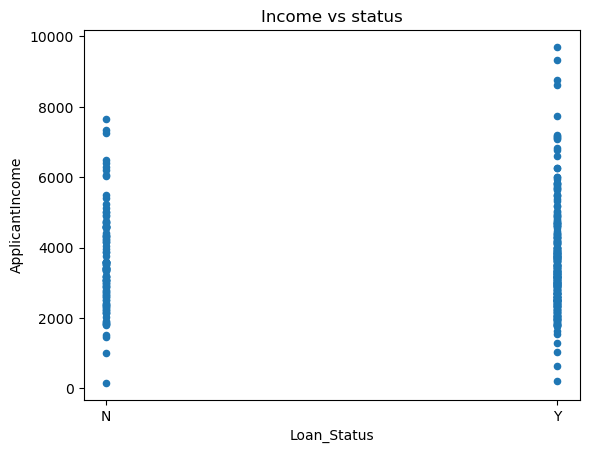

In [21]:
data.plot(kind='scatter',
                     x='Loan_Status',
                     y='ApplicantIncome',title='Income vs status')

In [ ]:
data.groupby('Property_Area')['Loan_Status'].value_counts().plot(kind='barh')


In [5]:

import seaborn as sns

C:\Users\as349\Anaconda3\envs\pandas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\as349\Anaconda3\envs\pandas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\as349\Anaconda3\envs\pandas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\as349\Anaconda3\envs\pandas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

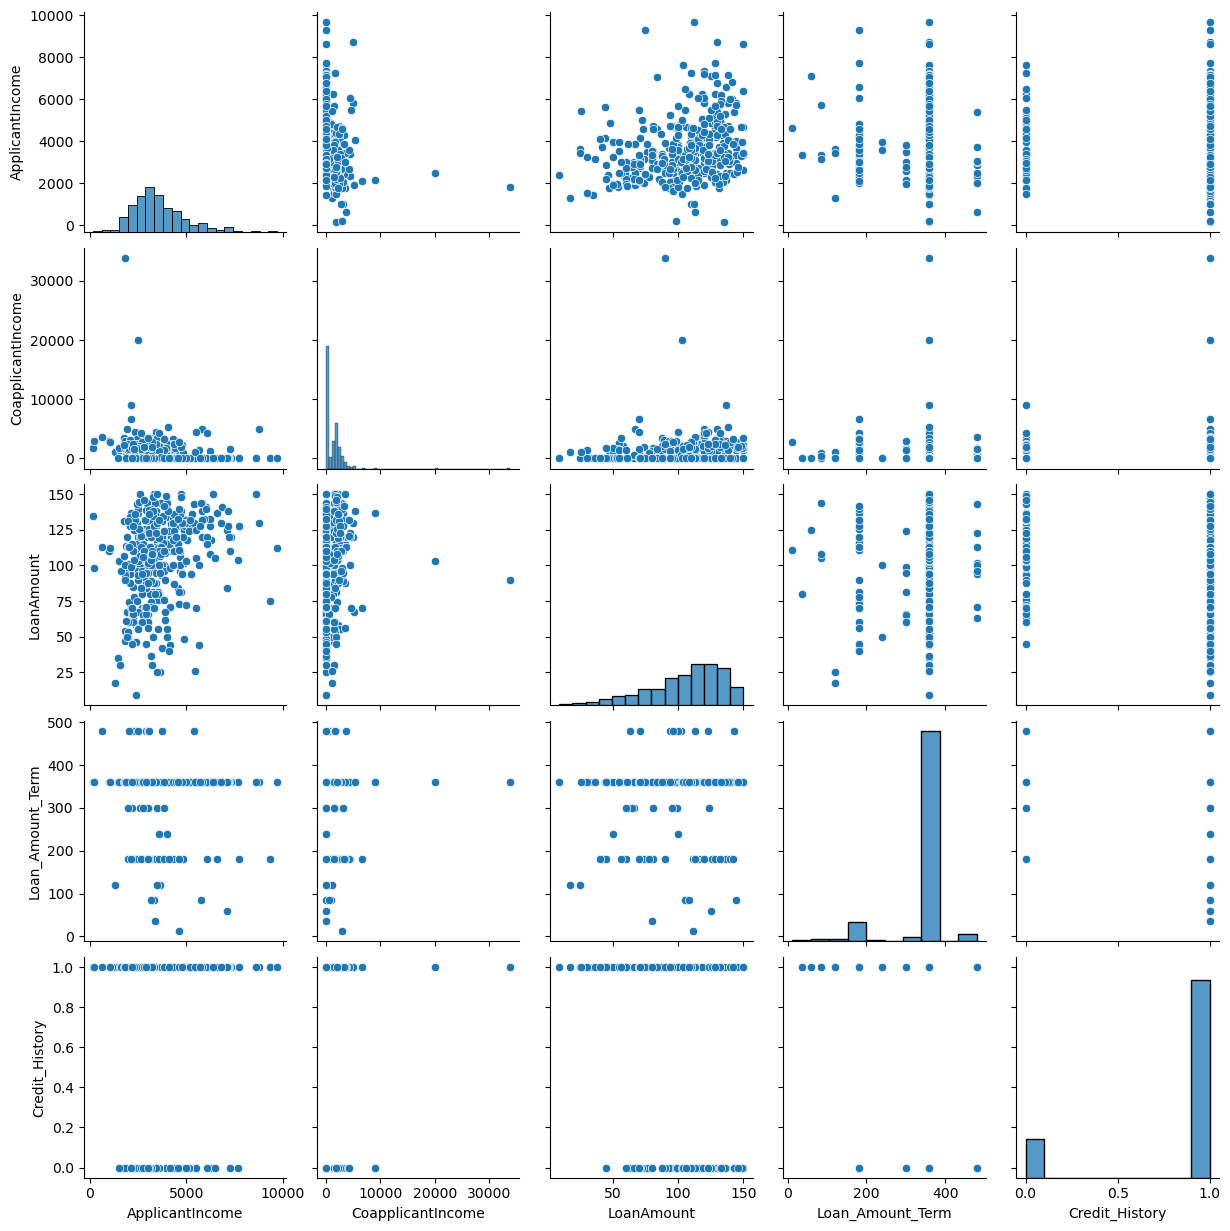

In [6]:

sns.pairplot(data)


<Axes: xlabel='Gender'>

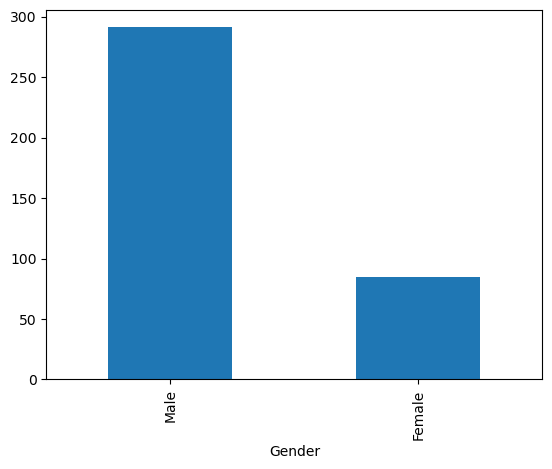

In [18]:
data['Gender'].value_counts().plot(kind='bar',x="Gender",y="Loan_Amount_Term")

<Axes: xlabel='Gender', ylabel='Loan_Amount_Term'>

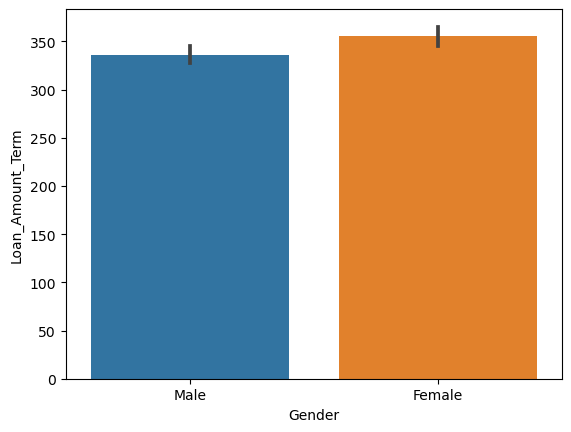

In [19]:
sns.barplot(x="Gender",y="Loan_Amount_Term",data=data)

<Axes: xlabel='Loan_Amount_Term', ylabel='ApplicantIncome'>

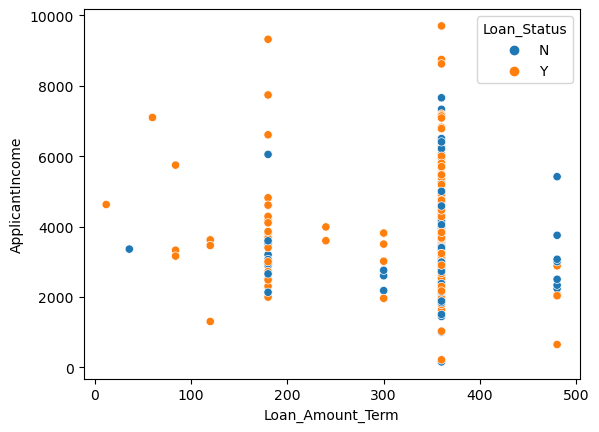

In [20]:
sns.scatterplot(x="Loan_Amount_Term",y="ApplicantIncome",data=data,hue='Loan_Status')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

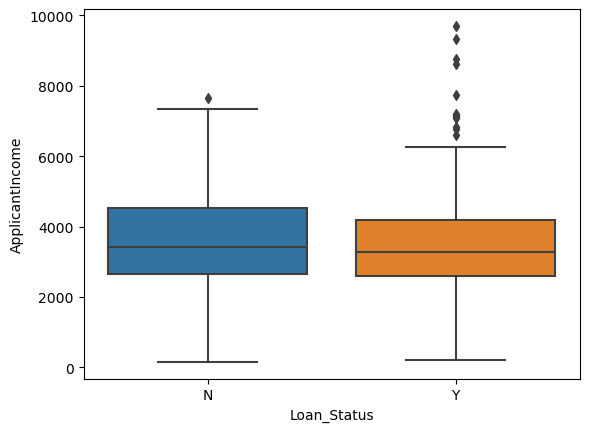

In [25]:
sns.boxplot(x="Loan_Status",y="ApplicantIncome",data=data)

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

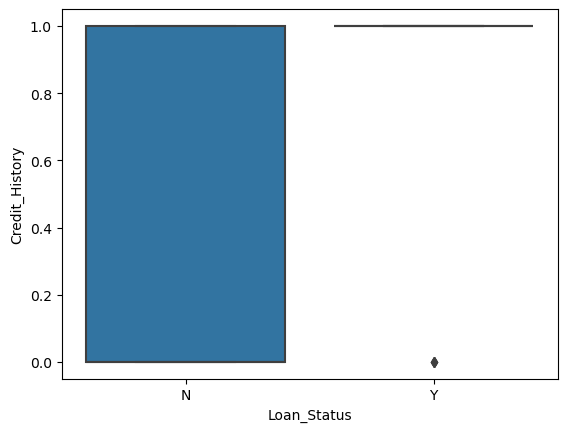

In [26]:
sns.boxplot(x="Loan_Status",y="Credit_History",data=data)

In [30]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: >

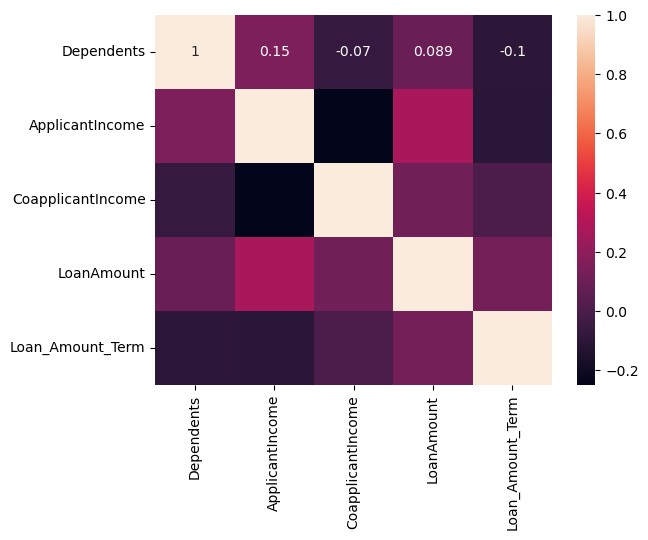

In [39]:

new_data=data.drop(columns=['Loan_ID', 'Gender', 'Married', 'Education',
       'Self_Employed','Property_Area',
        'Credit_History','Loan_Status'])
sns.heatmap(new_data.corr(),annot=True)